In [206]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [207]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import XorShift128PlusRNG

xorshiftp = XorShift128PlusRNG.FirefoxXorShift128PlusRNG(4412470881888093692, 8243466694241266509)
cached_data_30k = [xorshiftp.nextDouble() for _ in range(30000)]

def generate_title(num_items):
    default_graph_title = "Random Distribution"
    return default_graph_title + " : " + str(num_items) + " Numbers"

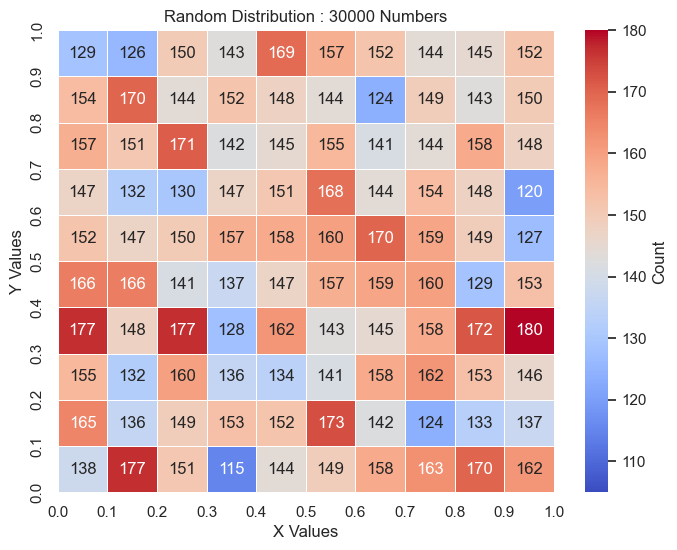

In [214]:
# Total number of items will be 'num_items * 2'. This is because we generate 2 data sets, one for each axis.
num_items = 15000

"""Generate new values"""
x_data = [xorshiftp.nextDouble() for _ in range(num_items)]
y_data = [xorshiftp.nextDouble() for _ in range(num_items)]
"""Use cached values"""
#x_data = cached_data_30k[:num_items]
#y_data = cached_data_30k[num_items:num_items*2]

plt.figure(figsize=(8, 6))

# 10 should really be the max here
bins = 10

heatmap_data, xedges, yedges = np.histogram2d(x_data, y_data, bins=bins, range=[[0, 1], [0, 1]])

ax = sns.heatmap(
    heatmap_data.T, 
    vmin=max(0, np.min(heatmap_data) - 10), 
    vmax=np.max(heatmap_data),
    cmap="coolwarm",
    linewidths=.5,
    annot=True, 
    fmt=".0f",
    cbar_kws={'label': 'Count'}
)

# So our labels are shown correctly
step_size = 1.0 / bins

x_ticks = np.arange(0.0, 1.1, step_size)
y_ticks = np.arange(0.0, 1.1, step_size)

x_ticks_len = len(x_ticks)
y_ticks_len = len(y_ticks)

ax.set_xticks(np.linspace(0, x_ticks_len - 1, x_ticks_len))
ax.set_yticks(np.linspace(0, y_ticks_len - 1, y_ticks_len))

ax.set_xticklabels([f"{val:.1f}" for val in x_ticks])
ax.set_yticklabels([f"{val:.1f}" for val in y_ticks])

ax.invert_yaxis()

plt.title(generate_title(len(x_values) + len(y_values)))
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.show()

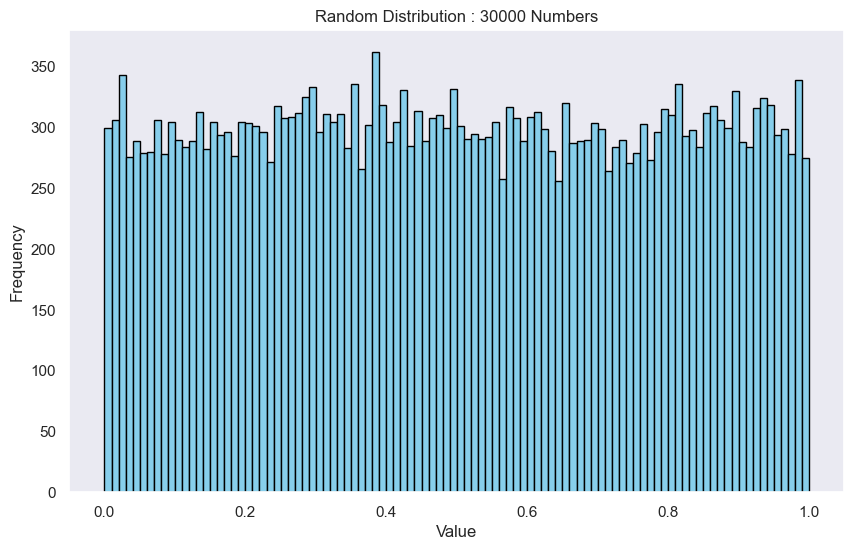

In [209]:
num_items = 30000
data = cached_data_30k[:num_items]

plt.figure(figsize=(10, 6))
plt.hist(data, bins=100, color='skyblue', edgecolor='black')
plt.title(generate_title(num_items))
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

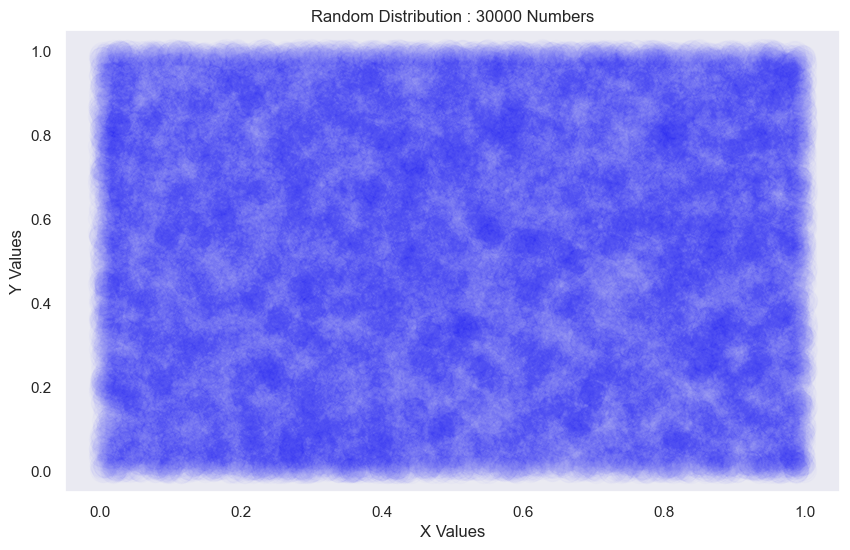

In [210]:
num_items = 30000
x_data = cached_data_30k
y_data = [xorshiftp.nextDouble() for _ in range(num_items)]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_data, y_data, s=300, color="blue", alpha=0.01)
plt.title(generate_title(num_items))
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.grid(False)
plt.show()

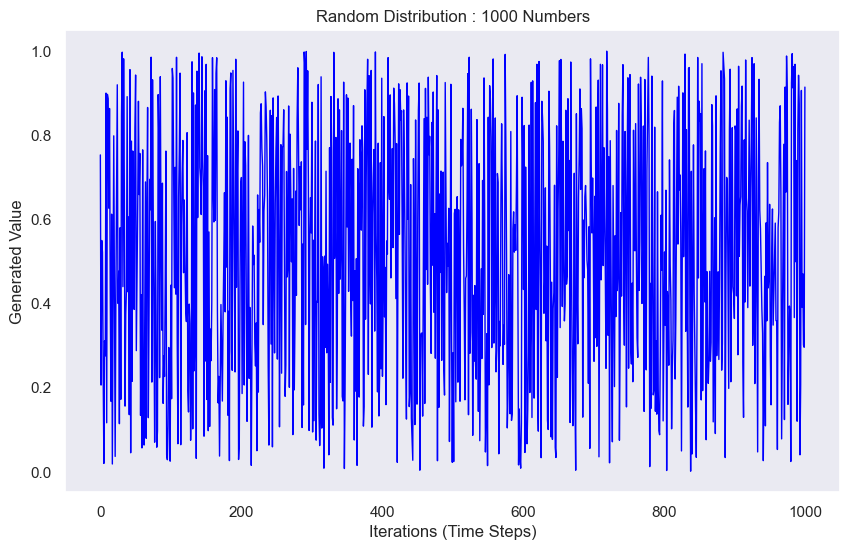

In [211]:
num_items = 1000

plt.figure(figsize=(10, 6))
plt.plot(range(num_items), cached_data_30k[:num_items], color='blue', lw=1)
plt.title(generate_title(num_items))
plt.xlabel("Iterations (Time Steps)")
plt.ylabel("Generated Value")
plt.grid(False)
plt.show()